In [1]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit
from Rui.query import query_cd

from src.arithmetic.counter import count
from src.arithmetic.increment import control_decrement
from src.logic.find_color_positions import FCP
from src.logic.oracles import oracle_a, oracle_b
from src.util.util import run_qc


Result from the remote Quantum Inspire backend:

State	Counts
010	1024

Result from the local Qiskit simulator backend:

{'010': 1024}


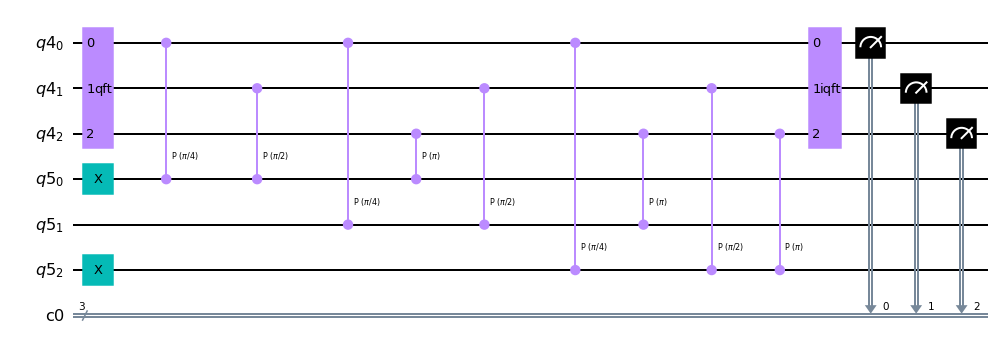

In [5]:
q = QuantumRegister(3)
a = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, a, c)

qc.x(a[0])
qc.x(a[2])

qc = count(qc, q, a)

# Should equal 010
qc.measure(q[:], c[:])

run_qc(qc)
qc.draw(output="mpl")


Result from the local Qiskit simulator backend:

{'101': 1024}


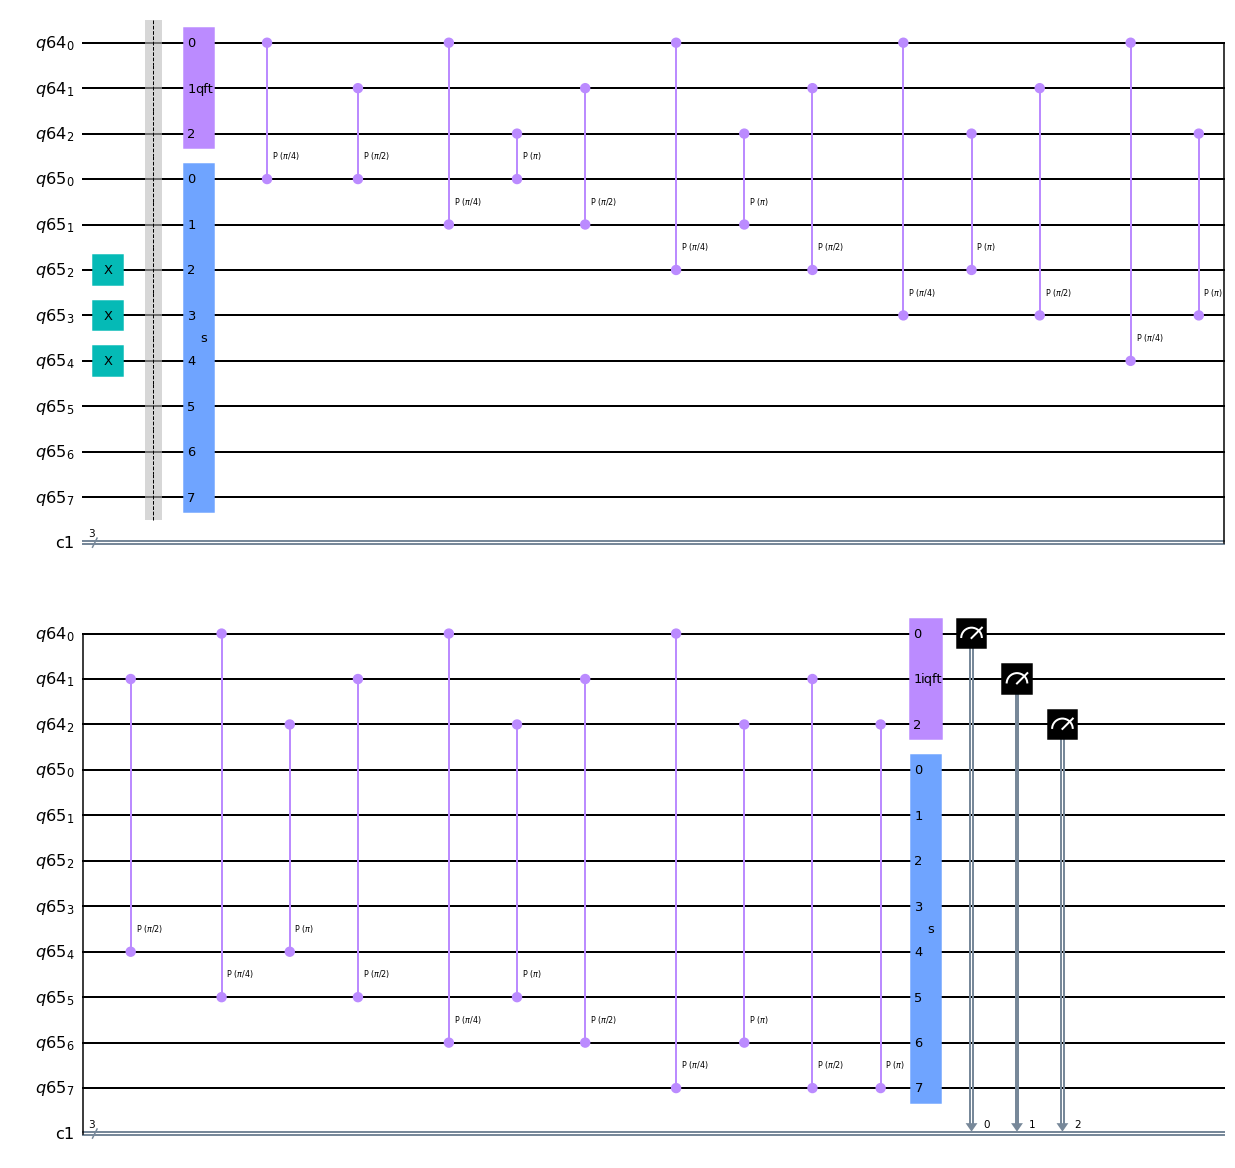

In [6]:
q = QuantumRegister(3)
a = QuantumRegister(8)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, a, c)


qc.x(a[2:5])
qc.barrier()

qc = oracle_a(qc, a, q, [0, 1, 2, 3])

# Should equal 110
qc.measure(q[:], c[:])

run_qc(qc, with_QI=False)
qc.draw(output="mpl")


Result from the remote Quantum Inspire backend:

State	Counts
000	1024

Result from the local Qiskit simulator backend:

{'000': 1024}


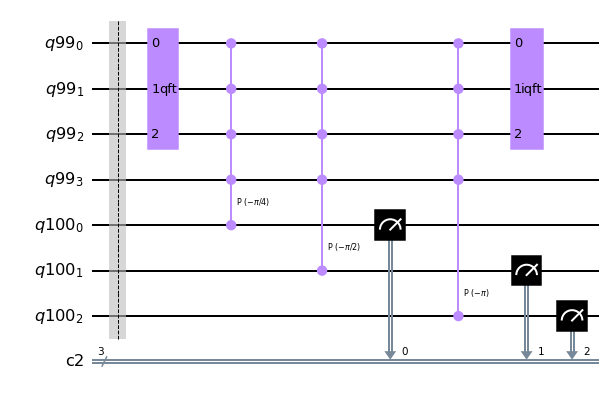

In [7]:
q = QuantumRegister(4)
a = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, a, c)

qc.barrier()

qc = control_decrement(qc, a, q)

# Should equal 110
qc.measure(a[:], c[:])

run_qc(qc)
qc.draw(output="mpl")

In [8]:
query_cd().draw(output='text')

┌───┐                    ┌───┐               
c_0: ──■───────────────────■──┤ X ├─────────────────■──┤ X ├───────────────
       │                   │  └───┘┌───┐            │  └───┘┌───┐          
c_1: ──┼────■──────────────┼────■──┤ X ├────────────┼────■──┤ X ├──────────
       │    │              │    │  └───┘┌───┐       │    │  └───┘┌───┐     
c_2: ──┼────┼────■─────────┼────┼────■──┤ X ├───────┼────┼────■──┤ X ├─────
       │    │    │         │    │    │  └───┘┌───┐  │    │    │  └───┘┌───┐
c_3: ──┼────┼────┼────■────┼────┼────┼────■──┤ X ├──┼────┼────┼────■──┤ X ├
     ┌─┴─┐  │    │    │    │    │    │    │  └───┘  │    │    │    │  └───┘
q_0: ┤ X ├──┼────┼────┼────┼────┼────┼────┼─────────┼────┼────┼────┼───────
     └───┘  │    │    │  ┌─┴─┐  │    │    │       ┌─┴─┐  │    │    │       
q_1: ───────┼────┼────┼──┤ X ├──┼────┼────┼───────┤ X ├──┼────┼────┼───────
          ┌─┴─┐  │    │  └───┘  │    │    │       └───┘  │    │    │       
q_2: ─────┤ X ├──┼────┼─────────┼────┼────┼──────────────┼────┼────┼───────
          └───┘  │    │       ┌─┴─┐  │    │            ┌─┴─┐  │    │       
q_3: ────────────┼────┼───────┤ X ├──┼────┼────────────┤ X ├──┼────┼───────
               ┌─┴─┐  │       └───┘  │    │            └───┘  │    │       
q_4: ──────────┤ X ├──┼──────────────┼────┼───────────────────┼────┼───────
               └───┘  │            ┌─┴─┐  │                 ┌─┴─┐  │       
q_5: ─────────────────┼────────────┤ X ├──┼─────────────────┤ X ├──┼───────
                    ┌─┴─┐          └───┘  │                 └───┘  │       
q_6: ───────────────┤ X ├─────────────────┼────────────────────────┼───────
                    └───┘               ┌─┴─┐                    ┌─┴─┐     
q_7: ───────────────────────────────────┤ X ├────────────────────┤ X ├─────
                                        └───┘                    └───┘


Result from the local Qiskit simulator backend:

{'1110': 1024}


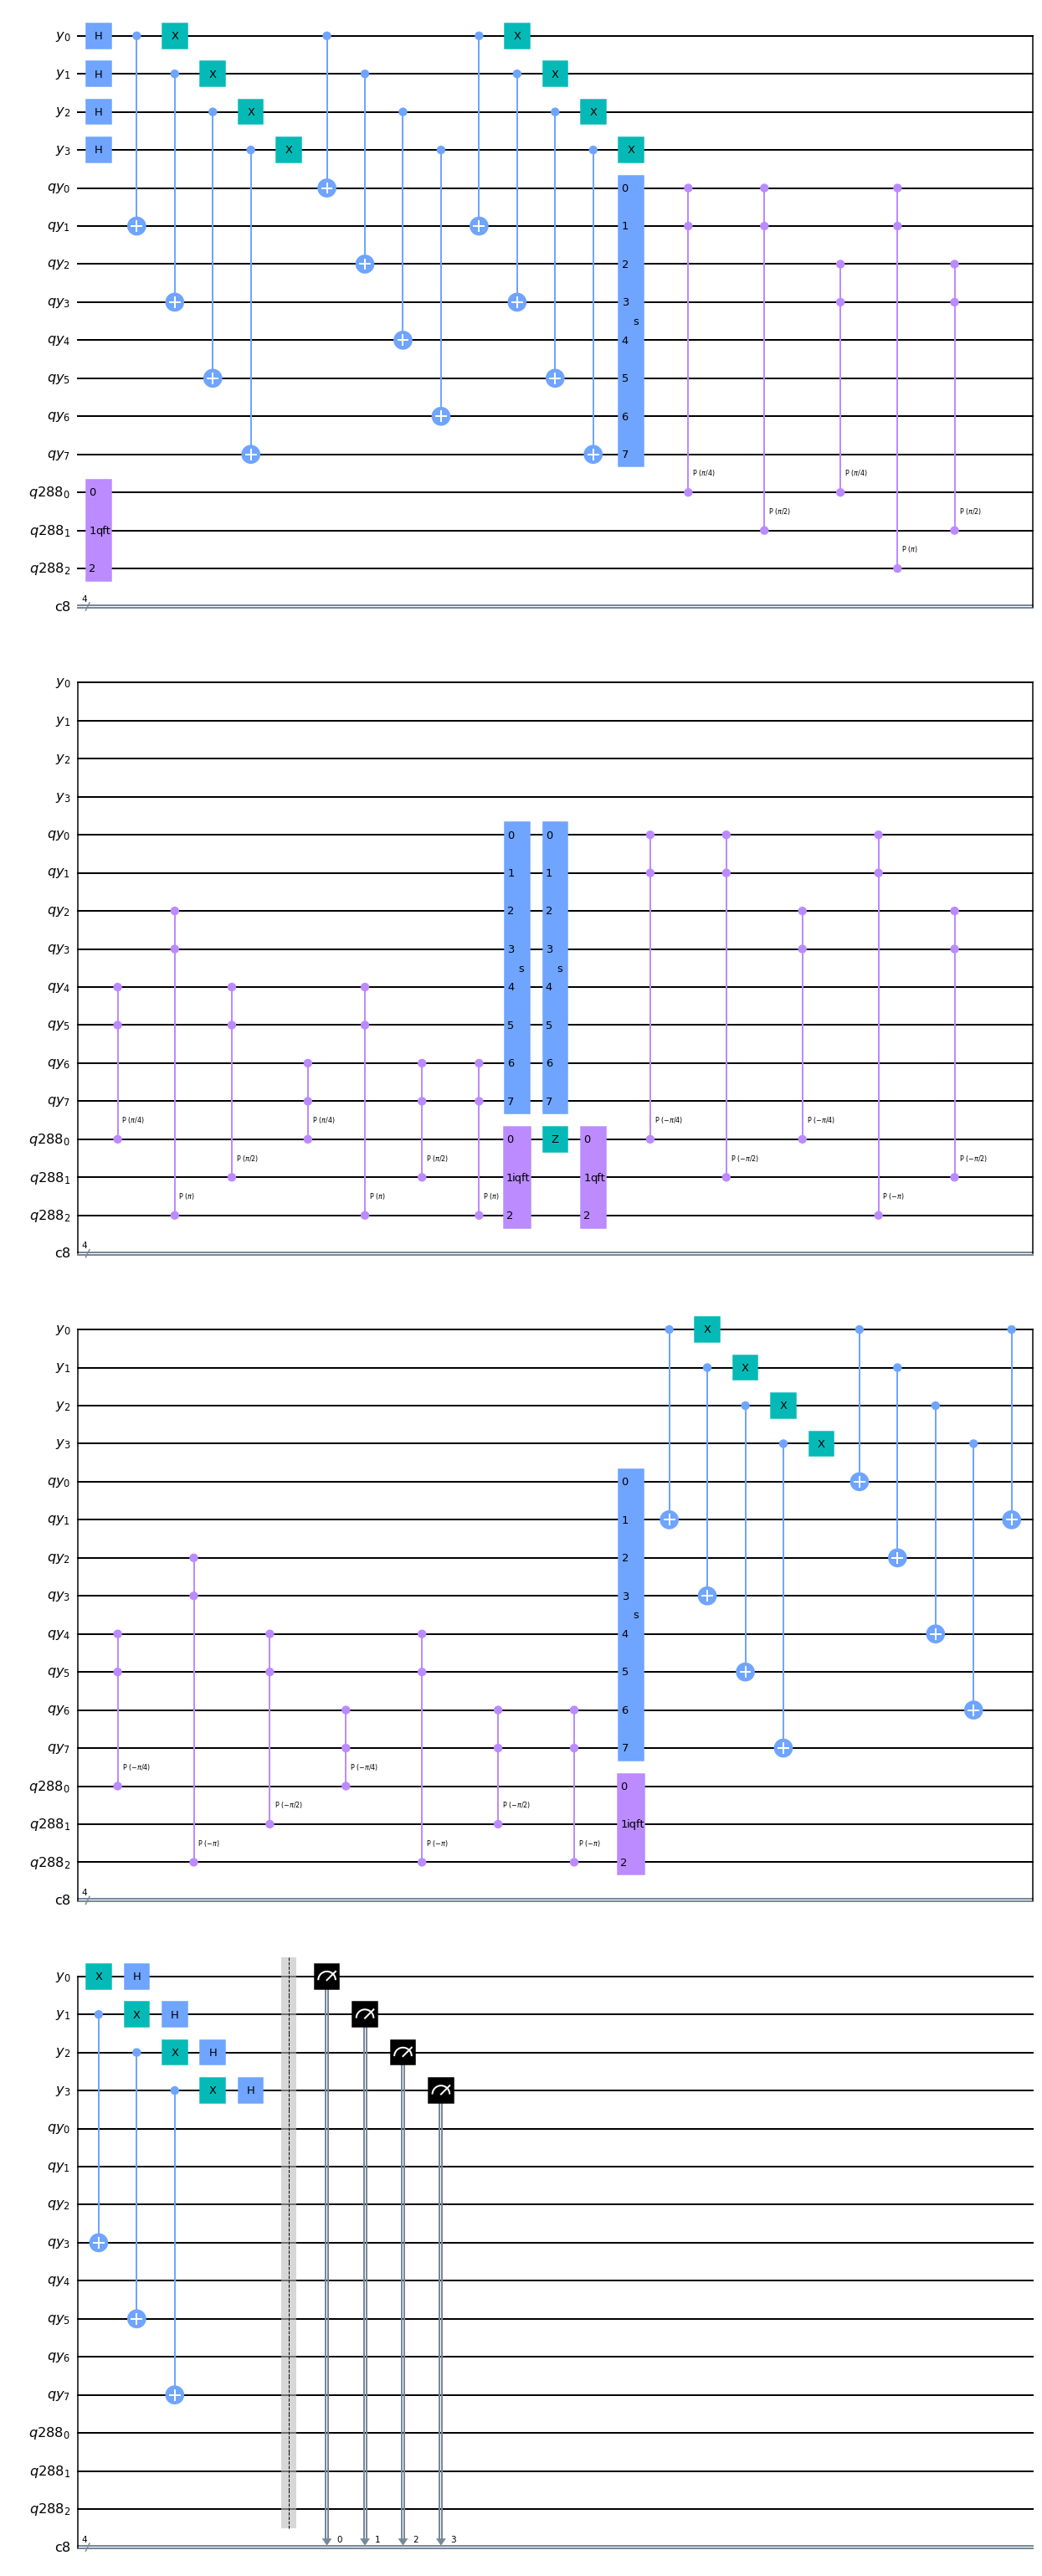

In [10]:
qy = QuantumRegister(8, name='qy')
y = QuantumRegister(4, name='y')
s = QuantumRegister(3)
c = ClassicalRegister(4)
qc = QuantumCircuit(y, qy, s, c)

# qc.x(qy[0])
qc = FCP(qc, y, qy, s, [0, 1, 1, 1], 2, 0)
qc.barrier()

qc.measure(y[:], c[:])

run_qc(qc, with_QI=False)
qc.draw(output="mpl")

In [10]:
q = QuantumRegister(8)
b = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, b, c)

# 10, 11, 11, 11

qc.x(q[1])
qc.x(q[7])
qc.barrier()

# [0, 0, 0, 1] = 11, 11, 11, 10

qc.compose(oracle_b(qc, q, b, [0, 0, 0, 1]).to_gate(label='oracle_b'))

# Should equal 110
qc.measure(b[:], c[:])

run_qc(qc, with_QI=False)
qc.draw(output="mpl")

0 3 [1, 0, 0, -1.0]
1 1 [1, -1.0, 1.0, -1.0]


QiskitError: 'Circuit with classical bits cannot be converted to gate.'